<a href="https://colab.research.google.com/github/norayehia/Datascience-Nlp-Ml-and-analyses-on-heathcare-data/blob/main/nlp_final_project_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
books = pd.read_csv('BX-Books.csv', error_bad_lines=False, delimiter=';', encoding = 'ISO-8859-1') 
books.columns = ['ISBN','bookTitle','bookAuthor','yearOfPublication','publisher','imageUrlS','imageUrlM','imageUrlL','Unnamed: 8','Unnamed: 9','Unnamed: 10']
users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns =['userID', 'Location', 'Age']
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.fillna(0)
ratings.columns = ['userID', 'ISBN', 'bookRating']


In [ ]:
books.head()


In [ ]:
print(ratings.shape)
print(list(ratings.columns))

(1149780, 3)
['userID', 'ISBN', 'bookRating']


In [ ]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,NaN,NaN,NaN
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,NaN,NaN,NaN
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,NaN,NaN,NaN
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,NaN,NaN,NaN
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,NaN,NaN,NaN


In [ ]:
print(books.shape)
print(list(books.columns))

(270933, 11)
['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10']


# deleting unimportant columns 

In [ ]:
del books['imageUrlS']
del books['imageUrlM']
del books['imageUrlL']
del books['Unnamed: 8']
del books['Unnamed: 9']
del books['Unnamed: 10']


In [ ]:
print(books.shape)
print(list(books.columns))

(270933, 5)
['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher']


In [ ]:
print(users.shape)
print(list(users.columns))

(278858, 3)
['userID', 'Location', 'Age']


# Preprocessing Data

In [ ]:
#rename data
books.rename(columns = {'ISBN':'ISBN','bookTitle':'title', 'bookAuthor':'author', 'yearOfPublication':'year', 'publisher':'publisher'}, inplace=True)
users.rename(columns = {'userID':'user_id', 'location':'location', 'age':'age'}, inplace=True)
ratings.rename(columns = {'userID':'user_id', 'bookRating':'rating','ISBN':'ISBN'}, inplace=True)

In [ ]:
books.head

<bound method NDFrame.head of              ISBN  ...                   publisher
0       195153448  ...     Oxford University Press
1         2005018  ...       HarperFlamingo Canada
2        60973129  ...             HarperPerennial
3       374157065  ...        Farrar Straus Giroux
4       393045218  ...  W. W. Norton &amp; Company
...           ...  ...                         ...
270928  373123914  ...                   Harlequin
270929  373244096  ...                  Silhouette
270930  373286856  ...                   Harlequin
270931  373761007  ...                  Silhouette
270932  340571187  ...            Trafalgar Square

[270933 rows x 5 columns]>

In [ ]:
ratings.head()

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


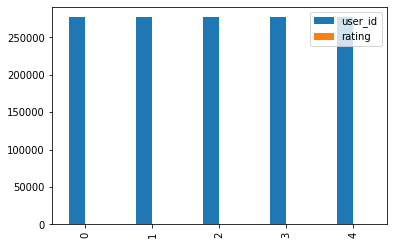

In [ ]:
ratings.head(5).plot(kind = "bar")

In [ ]:
users['Age']=users['Age'].fillna(users['Age'].mean())


In [ ]:
#convert age values from float to integer 
users['Age'] = users['Age'].astype(int)
users.head()


,userID,Location,Age
0,1,"nyc, new york, usa",34
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",34
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",34


## **# Discover outliers with visualizationtools Box plot**

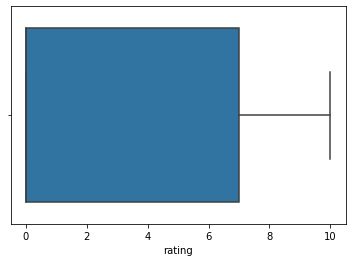

In [ ]:
import seaborn as sns
sns.boxplot(x=ratings['rating'])

there are not outliers in bookRating

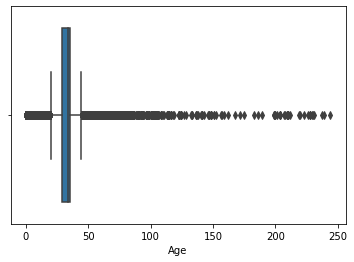

In [ ]:
sns.boxplot(x=users['Age'])

there are alot of outliers in age

# Exploratory Data Analysis

In [ ]:
ratings['user_id'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
158698        1
17920         1
277135        1
275086        1
187812        1
Name: user_id, Length: 105283, dtype: int64

In [ ]:
#Extract users and ratings of more than 200
x = ratings['user_id'].value_counts() > 200
y = x[x].index  #user_ids
print(y.shape)
print(x.shape)
ratings = ratings[ratings['user_id'].isin(y)]



(899,)
(899,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

# data integration

In [ ]:
#Merge ratings with books based on isbn in two tabels
rating_with_books = ratings.merge(books, on='ISBN')
rating_with_books.head()

# Transform data

In [ ]:
books.drop_duplicates()
users.drop_duplicates()

,user_id,Location,Age
0,1,"nyc, new york, usa",34
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",34
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",34
...,...,...,...
278853,278854,"portland, oregon, usa",34
278854,278855,"tacoma, washington, united kingdom",50
278855,278856,"brampton, ontario, canada",34
278856,278857,"knoxville, tennessee, usa",34


In [ ]:
#Extract books that have received more than 50 ratings
number_rating = rating_with_books.groupby('title')['rating'].count().reset_index()
number_rating.rename(columns= {'rating':'number_of_ratings'}, inplace=True)
final_rating = rating_with_books.merge(number_rating, on='title')
final_rating.shape
final_rating = final_rating[final_rating['number_of_ratings'] >= 50]
final_rating.drop_duplicates(['user_id','title'], inplace=True)


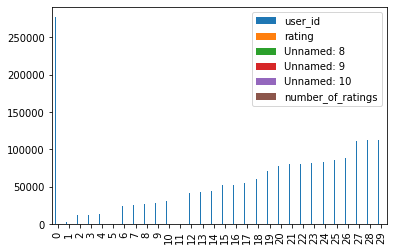

In [ ]:
final_rating.head(30).plot(kind = "bar")

In [ ]:
#Create Pivot Table
book_pivot = final_rating.pivot_table(columns='user_id', index='title', values="rating")
book_pivot.fillna(0, inplace=True)

In [ ]:
book_pivot

# Modeling

In [ ]:
#Compressed Sparse Row matrix
from scipy.sparse import csr_matrix
book_sparse = csr_matrix(book_pivot)

# KNN

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train.reshape(-1,1))
X_train = scaler.transform(X_train.reshape(-1,1))
X_test = scaler.transform(X_test.values.reshape(-1,1))

In [ ]:
#Training and Predictions
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
con=confusion_matrix(y_test, y_pred)
predection=classification_report(y_test, y_pred)

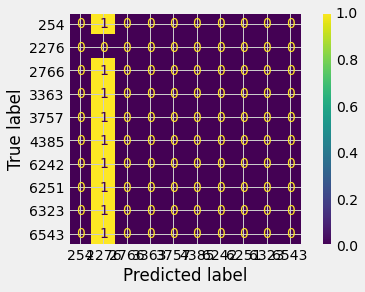

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test[1:10], y_test[1:10])  

In [ ]:
#Comparing Error Rate with the K Value
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

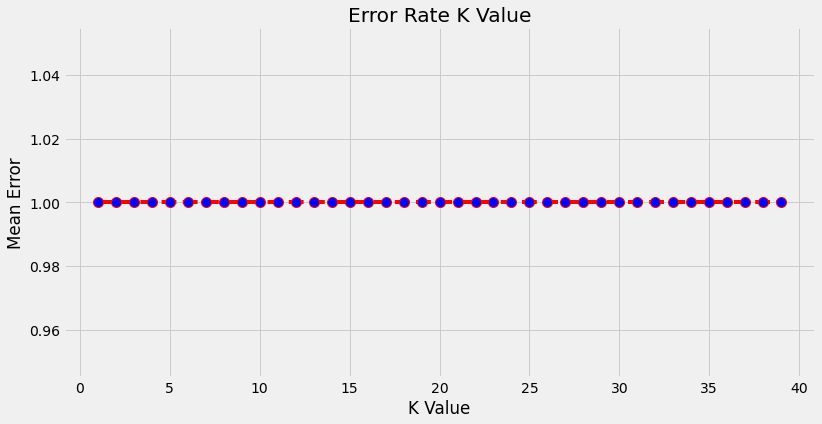

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# K_mean

In [ ]:
!pip install kneed
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
features, true_labels = make_blobs(
     n_samples=200,
     centers=3,
     cluster_std=2.75,
     random_state=42
  )

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
 kmeans = KMeans(
       init="random",
       n_clusters=3,
       n_init=10,
       max_iter=300,
       random_state=42
   )

In [ ]:
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=9,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

In [ ]:
 kmeans_kwargs = {
       "init": "random",
       "n_init": 10,
       "max_iter": 300,
       "random_state": 42,
   }

 # A list holds the SSE values for each k
sse = []
for k in range(1, 10):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(book_sparse)
        sse.append(kmeans.inertia_)

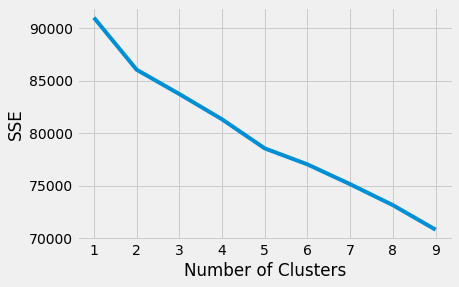

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 10), sse)
plt.xticks(range(1, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
kl = KneeLocator(
 range(1, 10), sse, curve="convex", direction="decreasing"
 )

kl.elbow

In [ ]:
centroids = kmeans.cluster_centers_
centroids[:,0].size
centroids[:1].size

810

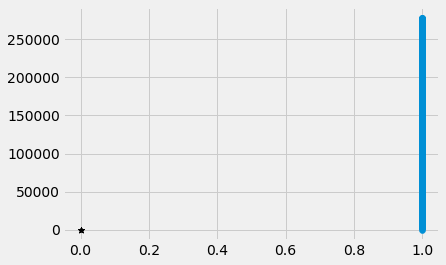

In [ ]:
# Centroid values
centroids = kmeans.cluster_centers_

plt.scatter(x,y,cmap='rainbow')
plt.scatter(centroids[:,0], centroids[:,1], color="black", marker='*')
plt.show()

In [ ]:
 # A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 10):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(book_sparse)
  score = silhouette_score(book_sparse, kmeans.labels_)
  silhouette_coefficients.append(score)


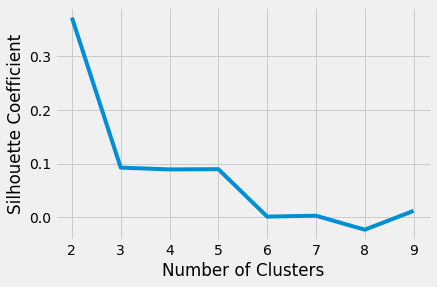

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,10), silhouette_coefficients)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

#REcommanddata2
1_contenbased recomander
2_itembased recomander 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [ ]:

# importing libraries
import pandas as pd
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [ ]:

# reading file
book_description = pd.read_csv('description.csv', encoding = 'latin-1')

In [ ]:
# checking if we have the right data
book_description.head()


,book_id,name,description
0,4833.0,The Glass Castle,"A tender, moving tale of unconditional love in..."
1,590.0,"Night (The Night Trilogy, #1)","Born into a Jewish ghetto in Hungary, as a chi..."
2,4264.0,"Angela's Ashes (Frank McCourt, #1)",Imbued on every page with Frank McCourt's asto...
3,3361.0,"Eat, Pray, Love","A celebrated writer's irresistible, candid, an..."
4,4535.0,Into Thin Air: A Personal Account of the Mount...,A bank of clouds was assembling on the not-so-...


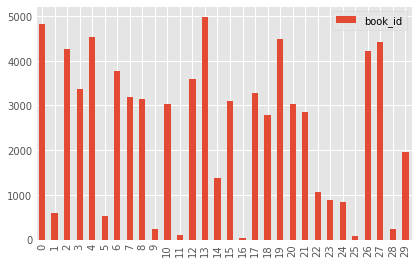

In [ ]:
book_description.head(30).plot(kind = "bar")

FEATUREENGINEARING

In [ ]:

# removing the stop words
books_tfidf = TfidfVectorizer(stop_words='english')
# filling the missing values with empty string
book_description['description'] = book_description['description'].fillna('')
# computing TF-IDF matrix required for calculating cosine similarity
book_description_matrix = books_tfidf.fit_transform(book_description['description'])

In [ ]:
# Let's check the shape of computed matrix
book_description_matrix.shape

<143x4186 sparse matrix of type '<class 'numpy.float64'>'
	with 7241 stored elements in Compressed Sparse Row format>

In [ ]:
# computing cosine similarity matrix using linear_kernal of sklearn
cosine_similarity = linear_kernel(book_description_matrix, book_description_matrix)
cosine_similarity

In [ ]:
indices = pd.Series(book_description['name'].index)


Content Base Recommender

In [ ]:
# Function to get the most similar books
def recommend(index, cosine_sim=cosine_similarity):
    id = indices[index]
    # Get the pairwsie similarity scores of all books compared to that book, 
    # sorting them and getting top 5
    similarity_scores = list(enumerate(cosine_sim[id]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[1:6]

    # Get the books index
    books_index = [i[0] for i in similarity_scores]

    # Return the top 5 most similar books using integer-location based indexing (iloc)
    return book_description['name'].iloc[books_index]

In [ ]:
# getting recommendation for book at index 2
recommend(2)

6                                 Running with Scissors 
29                            The Diary of a Young Girl 
116    It's St. Patrick's Day (Turtleback School & Li...
11     Persepolis: The Story of a Childhood (Persepol...
20     Maus I: A Survivor's Tale: My Father Bleeds Hi...
Name: name, dtype: object

In [ ]:
# getting recommendation for book at index 6
recommend(6)

2            Angela's Ashes (Frank McCourt, #1) 
9         A Child Called "It" (Dave Pelzer, #1) 
21         Wild Swans: Three Daughters of China 
22    A Long Way Gone: Memoirs of a Boy Soldier 
29                    The Diary of a Young Girl 
Name: name, dtype: object

#cluster

# kmeans item based recomader

For a business without any user-item purchase history, a search engine based recommendation system can be designed for users. Thebook recommendations can be based on textual clustering analysis given in book description.

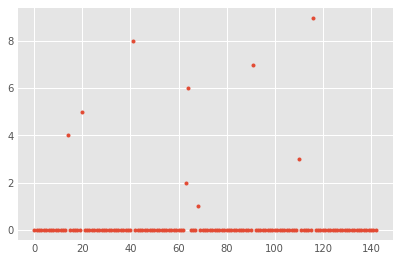

In [ ]:
# Fitting K-Means to the dataset

X=book_description_matrix 

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [ ]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [ ]:
# # Optimal clusters is 

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(book_description_matrix )

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = books_tfidf.get_feature_names()
for i in range(true_k):
    print_cluster(i)

In [ ]:
type(terms)

list

## wordcloud for words belong to clusters

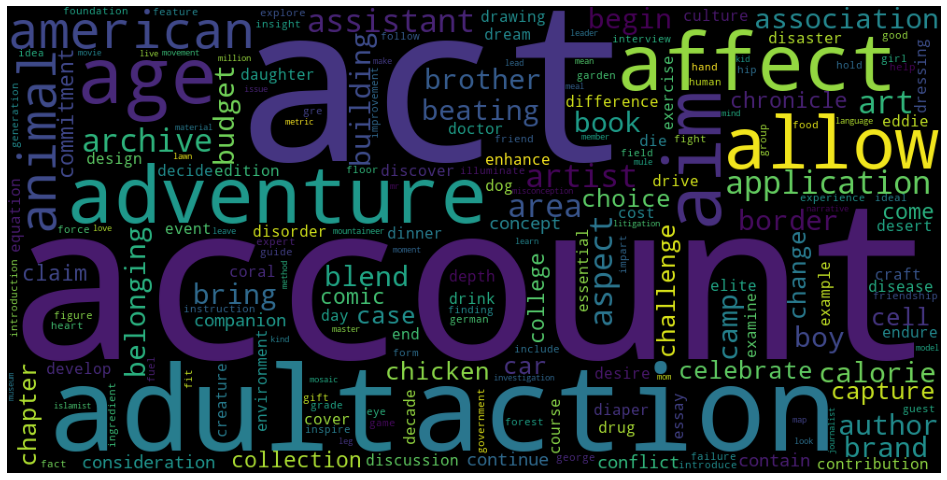

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#convert list to string and generate
unique_string=(",").join(terms)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

## wordcloud for words belong to description words 

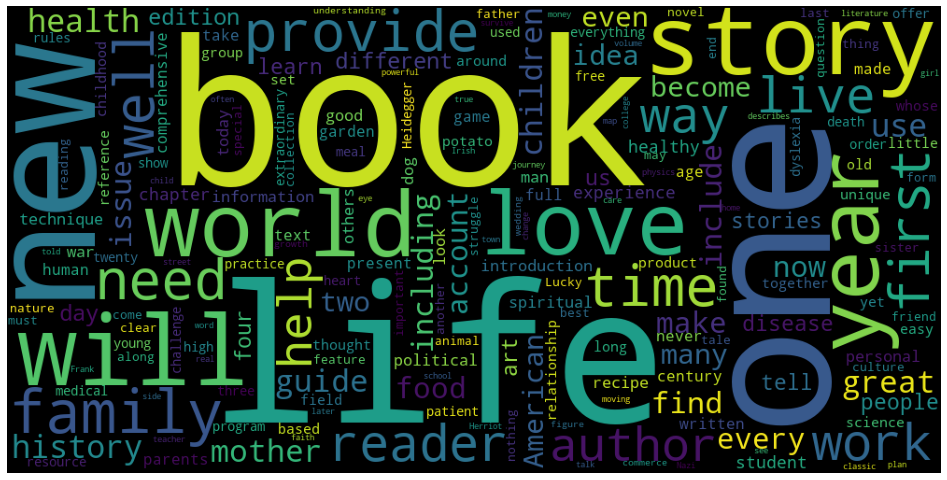

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
ndarray = book_description_matrix.toarray()
listword = ndarray.tolist()
listword

#convert list to string and generate
unique_string=(",").join(book_description['description'])
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()


In [ ]:
unique_string=(",").join(book_description['description'])
unique_string
res = unique_string.strip('][').split(' ')
import re

descriptionword_list=[string for string in res if string !=r'[0-9]']

descriptionword_list

['A',
 'tender,',
 'moving',
 'tale',
 'of',
 'unconditional',
 'love',
 'in',
 'a',
 'family',
 'that,',
 'despite',
 'its',
 'profound',
 'flaws,',
 'gave',
 'the',
 'author',
 'the',
 'fiery',
 'determination',
 'to',
 'carve',
 'out',
 'a',
 'successful',
 'life',
 'on',
 'her',
 'own',
 'terms.\nJeannette',
 'Walls',
 'grew',
 'up',
 'with',
 'parents',
 'whose',
 'ideals',
 'and',
 'stubborn',
 'nonconformity',
 'were',
 'both',
 'their',
 'curse',
 'and',
 'their',
 'salvation.',
 'Rex',
 'and',
 'Rose',
 'Mary',
 'Walls',
 'had',
 'four',
 'children.',
 'In',
 'the',
 'beginning,',
 'they',
 'lived',
 'like',
 'nomads,',
 'moving',
 'among',
 'Southwest',
 'desert',
 'towns,',
 'camping',
 'in',
 'the',
 'mountains.',
 'Rex',
 'was',
 'a',
 'charismatic,',
 'brilliant',
 'man',
 'who,',
 'when',
 'sober,',
 'captured',
 'his',
 "children's",
 'imagination,',
 'teaching',
 'them',
 'physics,',
 'geology,',
 'and',
 'above',
 'all,',
 'how',
 'to',
 'embrace',
 'life',
 'fearless

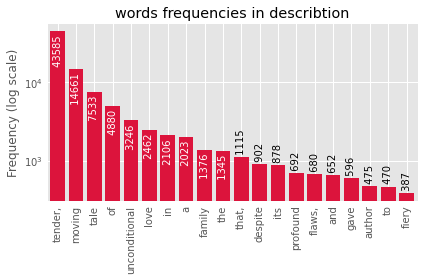

In [ ]:
from collections import Counter
import numpy as np
from matplotlib import pyplot as plt
indices = np.random.zipf(1.6, size=100000).astype(np.int) % len(descriptionword_list)
tweets = np.array(descriptionword_list)[indices]

tf = Counter(tweets)

y = [count for tag, count in tf.most_common(20)]
x = [tag for tag, count in tf.most_common(20)]

plt.bar(x, y, color='crimson')
plt.title("words frequencies in describtion")
plt.ylabel("Frequency (log scale)")
plt.yscale('log') # optionally set a log scale for the y-axis
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(tf.most_common(20)):
    plt.text(i, count, f' {count} ', rotation=90,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()

In [ ]:
import re

new_string=[string for string in terms if string !=r'[0-9]']

new_string[200:350]


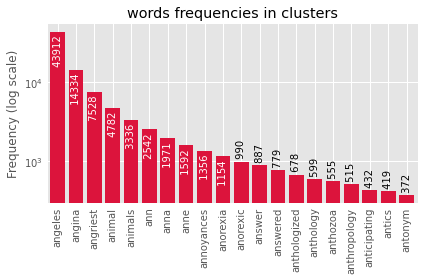

In [ ]:
from collections import Counter
import numpy as np
from matplotlib import pyplot as plt
#terms_l = terms.strip('][').split(', ')

indices = np.random.zipf(1.6, size=100000).astype(np.int) % len(new_string[200:350])
tweets = np.array(new_string[200:350])[indices]

tf = Counter(tweets)

y = [count for tag, count in tf.most_common(20)]
x = [tag for tag, count in tf.most_common(20)]

plt.bar(x, y, color='crimson')
plt.title("words frequencies in clusters")
plt.ylabel("Frequency (log scale)")
plt.yscale('log') # optionally set a log scale for the y-axis
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(tf.most_common(20)):
    plt.text(i, count, f' {count} ', rotation=90,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()

In [ ]:
#test
def show_recommendations(product):
    #print("Cluster ID:")
    Y = books_tfidf.transform([product])
    
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [ ]:
show_recommendations("daughter")

Cluster 1:
 book
 life
 new
 world
 love
 story
 guide
 family
 health
 readers


#classfication

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('listing.csv', encoding = 'latin-1')
books = pd.read_csv('books.csv', encoding = 'latin-1')
data
books


,book_id,avg_rating,no_of_ratings,user_id,user_rating
0,4833,4.25,7156.0,3466,0
1,590,4.31,7821.0,3466,5
2,4264,4.08,3836.0,3453,5
3,3361,3.52,1245.0,3453,4
4,4535,4.13,3107.0,3453,0
...,...,...,...,...,...
2307,4061,4.00,2366.0,3400,4
2308,740,5.00,6820.0,3843,4
2309,3319,4.00,1255.0,1331,2
2310,4122,4.00,213.0,1119,4


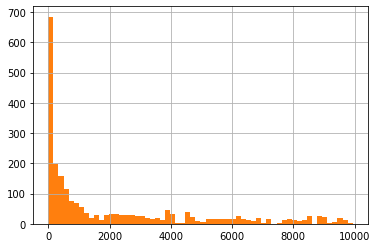

In [ ]:
# Visualize:
import matplotlib.pyplot as plt
%matplotlib inline
books['user_rating'].hist(bins=50)
books['no_of_ratings'].hist(bins=60)

,book_id,avg_rating,no_of_ratings,user_id,user_rating
529,4755,3.00,9936.0,3476,2
2232,4755,3.00,9936.0,577,2
1438,4755,3.00,9936.0,3472,4
907,4755,3.00,9936.0,3483,3
707,2409,3.00,9768.0,3475,0
1085,2409,3.00,9768.0,7130,0
2032,2409,3.00,9768.0,3466,5
1252,2194,4.22,9754.0,3461,1
1384,4696,5.00,9754.0,3470,3
475,4696,5.00,9754.0,3217,3


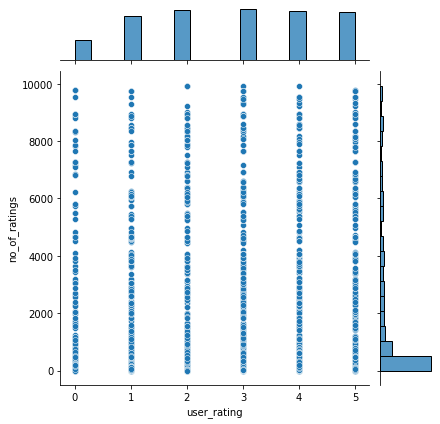

In [ ]:
# Joint Plot:
import seaborn as sns
sns.jointplot(x='user_rating', y='no_of_ratings', data=books)



books.sort_values('no_of_ratings', ascending=False).head(10)

In [ ]:
# Preparing data table for analysis
ratings_pivot = pd.pivot_table(data=books, values='user_rating', index='user_id', columns='book_id')
ratings_pivot.head()
ratings_pivot=ratings_pivot.fillna(0)
ratings_pivot
#transops to make row bookid
X = ratings_pivot.T
X.head()

user_id,117,176,232,295,318,330,386,397,399,446,484,514,530,577,578,579,585,605,680,702,703,708,806,820,853,875,967,973,1007,1044,1046,1049,1083,1119,1125,1144,1151,1152,1183,1203,...,3444,3449,3453,3461,3466,3468,3469,3470,3471,3472,3474,3475,3476,3478,3479,3480,3482,3483,3484,3486,3497,3498,3500,3521,3566,3568,3570,3648,3655,3795,3804,3830,3843,3849,3913,3937,3952,3973,7130,7131
book_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Compressed Sparse Row matrix
from scipy.sparse import csr_matrix
book_sparse = csr_matrix(X)

In [ ]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute')
model.fit(book_sparse)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:
distances, suggestions = model.kneighbors(X.iloc[237, :].values.reshape(1, -1))

In [ ]:
for i in range(len(suggestions)):
  print(X.index[suggestions[i]])

Int64Index([1707, 1853, 3642, 3333, 2560], dtype='int64', name='book_id')


sv

In [ ]:
#ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0) we hahave pivt 
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(710, 10)

In [ ]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


(710, 710)

In [ ]:
X.index[99]

678

In [ ]:
i = 678

product_names = list(X.index)
booktil = product_names.index(i)
booktil

99

In [ ]:
correlation_product_ID = correlation_matrix[booktil]
correlation_product_ID.shape
correlation_product_ID

array([ 1.85471693e-02,  2.04871038e-01,  3.82192739e-02, -4.13461648e-01,
        7.81350259e-01,  6.09406087e-03,  1.02420926e-01,  6.60905877e-02,
       -1.71200957e-01,  2.00067781e-02,  7.06797393e-02,  4.44746795e-01,
       -1.20487962e-01,  4.72400753e-02,  4.51487668e-03,  8.45806363e-04,
        2.37860797e-01,  2.53202275e-01,  3.06559994e-01,  7.95581162e-01,
        9.05549087e-01,  5.03609232e-02,  1.43125385e-01,  4.99905589e-02,
        6.69648476e-02,  1.78574020e-01,  5.88432049e-03, -6.75721555e-02,
        8.07156785e-01,  2.21280304e-02,  9.63671395e-01,  1.92848651e-01,
        1.00119935e-01,  2.21280304e-02, -1.02277945e-01,  6.62012053e-02,
        1.55455139e-01,  4.68075875e-02,             nan,  3.75633091e-02,
        6.75192959e-02,  1.53519924e-01,  1.09453471e-01, -1.39441908e-01,
        1.95439287e-01,             nan, -5.11753139e-02,  3.43424662e-01,
        1.04928591e-02,  8.10298624e-01, -1.16265905e-01,  6.74485477e-01,
        1.56833129e-01,  

In [ ]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
#Recommend.remove(i) 

Recommend[0:9]

[107, 196, 678, 1615, 2276, 2458, 2526, 2637, 2846]

In [ ]:
#getting the title of the recommended movies
#movies = pd.read_csv('/content/drive/MyDrive/data/movies.csv')
#movies.head()
recommended = books[books['book_id'].isin(Recommend[0:9])]
recommended

,book_id,avg_rating,no_of_ratings,user_id,user_rating
130,107,0.00,0.0,3470,4
134,2276,4.46,225.0,3470,2
148,2637,4.00,4067.0,3470,4
150,2846,3.62,8555.0,3470,2
152,2526,0.00,14.0,3470,3
153,196,3.67,972.0,3470,4
159,2458,3.99,2679.0,3470,2
162,1615,4.00,130.0,3470,5
167,678,4.67,76.0,3470,5
279,107,0.00,0.0,3470,1


#classfication

In [ ]:
pip install surprise

     |████████████████████████████████| 11.8 MB 44 kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617774 sha256=2e7e5073ef55b9f74bc382f20e1b5517852419575361d36e633b4b6b0f1d37c3
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
from datetime import datetime
import os
import pandas as pd
import numpy as np
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import KFold
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import SVD
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from collections import defaultdict

In [ ]:
books = pd.read_csv('books.csv', encoding = 'latin-1')


# for whole dataframe
books = books.replace( 0,np.nan)
books

,book_id,avg_rating,no_of_ratings,user_id,user_rating
0,4833,4.25,7156.0,3466,NaN
1,590,4.31,7821.0,3466,5.0
2,4264,4.08,3836.0,3453,5.0
3,3361,3.52,1245.0,3453,4.0
4,4535,4.13,3107.0,3453,NaN
...,...,...,...,...,...
2307,4061,4.00,2366.0,3400,4.0
2308,740,5.00,6820.0,3843,4.0
2309,3319,4.00,1255.0,1331,2.0
2310,4122,4.00,213.0,1119,4.0


In [ ]:
#remove NaN from age
books['user_rating']=books['user_rating'].fillna(books['user_rating'].mean())

In [ ]:
ratings_dict = {'itemID': list(books.book_id),
                'userID': list(books.user_id),
                'rating': list(books.user_rating)}

df = pd.DataFrame(ratings_dict)
df.shape

reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)

In [ ]:
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)

benchmark = []

for algorithm in [SVD(), NMF(), NormalPredictor(), KNNBasic()]:
    
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]],index=['Algorithm']))
    benchmark.append(tmp)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [ ]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')
surprise_results

,test_rmse,fit_time,test_time
Algorithm,,,
SVD,1.365162,0.089213,0.005596
KNNBasic,1.654975,0.002204,0.008047
NMF,1.691358,0.168536,0.004919
NormalPredictor,1.800854,0.003060,0.006777


In [ ]:
trainset, testset = train_test_split(data, test_size=0.25)
algo = SVD()
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

RMSE: 1.3849


1.384870205925385

In [ ]:
trainset = data.build_full_trainset() 
algo = SVD()
algo.fit(trainset)
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

In [ ]:
def get_all_predictions(predictions):
    # First map the predictions to each user.
    top_n = defaultdict(list)    
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
        
    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)

    return top_n

In [ ]:
all_pred = get_all_predictions(predictions)

In [ ]:
#To get top 5 reommendation
n = 5

for uid, user_ratings in all_pred.items():
    user_ratings.sort(key=lambda x: x[1], reverse=True)
    all_pred[uid] = user_ratings[:n]

In [ ]:
tmp = pd.DataFrame.from_dict(all_pred)
tmp_transpose = tmp.transpose()

In [ ]:
def get_predictions(user_id):
    results = tmp_transpose.loc[user_id]
    return results

In [ ]:
user_id= 3400
results = get_predictions(user_id)
results

0      (2605, 3.92028914377049)
1     (4676, 3.668700976418307)
2    (1613, 3.6565770001969002)
3      (3938, 3.61699258992507)
4    (4330, 3.5951991574055477)
Name: 3400, dtype: object

In [ ]:
recommended_book_ids=[]
for x in range(0, n):
    recommended_book_ids.append(results[x][0])

recommended_book_ids

[2605, 4676, 1613, 3938, 4330]

In [ ]:
#getting the title of the recommended movies

recommended_books = books[books['book_id'].isin(recommended_book_ids)]
recommended_books

,book_id,avg_rating,no_of_ratings,user_id,user_rating
155,2605,5.00,94.0,3470,5.0
178,4330,3.67,8882.0,3461,5.0
304,2605,5.00,94.0,3472,4.0
327,4330,3.67,8882.0,3331,5.0
481,3938,2.00,786.0,3475,4.0
561,1613,4.00,2097.0,2460,5.0
805,4676,5.00,690.0,3479,4.0
859,3938,2.00,786.0,3482,5.0
939,1613,4.00,2097.0,1183,4.0
1159,2605,5.00,94.0,3229,4.0


#knn

In [ ]:
trainset, testset = train_test_split(data, test_size=0.25)
algo = KNNBasic()
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

trainset = data.build_full_trainset() 
algo = KNNBasic()
algo.fit(trainset)
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.6446
Computing the msd similarity matrix...
Done computing similarity matrix.


In [ ]:
def get_all_predictions(predictions):
    # First map the predictions to each user.
    top_n = defaultdict(list)    
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
        
    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)

    return top_n

In [ ]:
all_pred = get_all_predictions(predictions)

In [ ]:
#To get top 5 reommendation
n = 5

for uid, user_ratings in all_pred.items():
    user_ratings.sort(key=lambda x: x[1], reverse=True)
    all_pred[uid] = user_ratings[:n]

In [ ]:
tmp = pd.DataFrame.from_dict(all_pred)
tmp_transpose = tmp.transpose()

In [ ]:
def get_predictions(user_id):
    results = tmp_transpose.loc[user_id]
    return results

In [ ]:
user_id= 3400
results = get_predictions(user_id)
results

0    (4365, 5.0)
1    (1186, 5.0)
2    (3214, 5.0)
3    (2948, 5.0)
4     (678, 5.0)
Name: 3400, dtype: object

In [ ]:
recommended_book_ids=[]
for x in range(0, n):
    recommended_book_ids.append(results[x][0])

recommended_book_ids

[4365, 1186, 3214, 2948, 678]

In [ ]:
recommended_books = books[books['book_id'].isin(recommended_book_ids)]
recommended_books

,book_id,avg_rating,no_of_ratings,user_id,user_rating
127,4365,4.00,1.0,3461,5.000000
132,1186,NaN,NaN,3470,3.028612
154,3214,4.00,5525.0,3470,4.000000
163,2948,3.77,109.0,3470,5.000000
167,678,4.67,76.0,3470,5.000000
276,4365,4.00,1.0,3470,1.000000
281,1186,NaN,NaN,3470,4.000000
303,3214,4.00,5525.0,3472,3.000000
312,2948,3.77,109.0,3470,5.000000
316,678,4.67,76.0,3470,5.000000


#NMF

In [ ]:
trainset, testset = train_test_split(data, test_size=0.25)
algo = NMF()
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

trainset = data.build_full_trainset() 
algo = NMF()
algo.fit(trainset)
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

RMSE: 1.7059


In [ ]:
def get_all_predictions(predictions):
    # First map the predictions to each user.
    top_n = defaultdict(list)    
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
        
    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)

    return top_n





all_pred = get_all_predictions(predictions)    

In [ ]:
#To get top 5 reommendation
n = 5

for uid, user_ratings in all_pred.items():
    user_ratings.sort(key=lambda x: x[1], reverse=True)
    all_pred[uid] = user_ratings[:n]

In [ ]:
tmp = pd.DataFrame.from_dict(all_pred)
tmp_transpose = tmp.transpose()

In [ ]:
def get_predictions(user_id):
    results = tmp_transpose.loc[user_id]
    return results


In [ ]:
user_id= 3400
results = get_predictions(user_id)
results

0                   (2948, 5.0)
1      (144, 4.877277674032803)
2     (3014, 4.840071201731429)
3    (1613, 4.7234703405983725)
4     (4827, 4.682903298036742)
Name: 3400, dtype: object

In [ ]:
recommended_book_ids=[]
for x in range(0, n):
    recommended_book_ids.append(results[x][0])

recommended_book_ids

[2948, 144, 3014, 1613, 4827]

In [ ]:
recommended_books = books[books['book_id'].isin(recommended_book_ids)]
recommended_books

,book_id,avg_rating,no_of_ratings,user_id,user_rating
163,2948,3.77,109.0,3470,5.0
191,144,4.83,8079.0,3471,5.0
312,2948,3.77,109.0,3470,5.0
340,144,4.83,8079.0,3472,5.0
452,3014,4.00,4606.0,3474,1.0
561,1613,4.00,2097.0,2460,5.0
626,4827,4.00,867.0,3471,4.0
830,3014,4.00,4606.0,3482,2.0
939,1613,4.00,2097.0,1183,4.0
1004,4827,4.00,867.0,176,1.0


#Co-Clustering

#clustering

In [ ]:
trainset, testset = train_test_split(data, test_size=0.25)
algo =CoClustering()
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

trainset = data.build_full_trainset() 
algo =CoClustering()
algo.fit(trainset)
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

RMSE: 1.6274


In [ ]:
def get_all_predictions(predictions):
    # First map the predictions to each user.
    top_n = defaultdict(list)    
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
        
    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)

    return top_n





all_pred = get_all_predictions(predictions)

In [ ]:
#To get top 5 reommendation
n = 5

for uid, user_ratings in all_pred.items():
    user_ratings.sort(key=lambda x: x[1], reverse=True)
    all_pred[uid] = user_ratings[:n]

In [ ]:
tmp = pd.DataFrame.from_dict(all_pred)
tmp_transpose = tmp.transpose()

In [ ]:
def get_predictions(user_id):
    results = tmp_transpose.loc[user_id]
    return results
user_id= 3400
results = get_predictions(user_id)
results

0     (225, 5.0)
1    (2786, 5.0)
2    (4222, 5.0)
3    (4414, 5.0)
4    (3571, 5.0)
Name: 3400, dtype: object

In [ ]:
recommended_book_ids=[]
for x in range(0, n):
    recommended_book_ids.append(results[x][0])

recommended_book_ids

[225, 2786, 4222, 4414, 3571]

In [ ]:
recommended_books = books[books['book_id'].isin(recommended_book_ids)]
recommended_books

,book_id,avg_rating,no_of_ratings,user_id,user_rating
9,225,4.09,3957.0,3453,5.0
18,2786,4.05,2886.0,3466,5.0
26,4222,4.20,6643.0,3466,5.0
27,4414,3.95,6768.0,3466,5.0
30,3571,4.53,17.0,3453,5.0
84,225,4.09,3957.0,3229,2.0
93,2786,4.05,2886.0,3426,3.0
1595,2786,4.05,2886.0,3476,4.0
